In [13]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [14]:
# Step 2: Load the Dataset

df = pd.read_csv('house.csv')
display(df.head())

,Area,Bedrooms,Bathrooms,Material,Locality,Price
0,1790,2,2,Concrete,Riverside,114300
1,2030,4,2,Concrete,Riverside,114200
2,1740,3,2,Concrete,Riverside,114800
3,1980,3,2,Concrete,Riverside,94700
4,2130,3,3,Concrete,Riverside,119800


In [15]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [16]:
# Step 3: Choose Feature and Target

X = df[['Area']]
y = df['Price']

In [17]:
# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [18]:
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)

In [19]:
polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
print(f"w: {polynomial_regression_model.coef_}")
print(f"b: {polynomial_regression_model.intercept_}")

w: [-16.09583328   0.02261465]
b: 71619.28414660943


/Users/psundara/miniconda3/envs/python-series/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


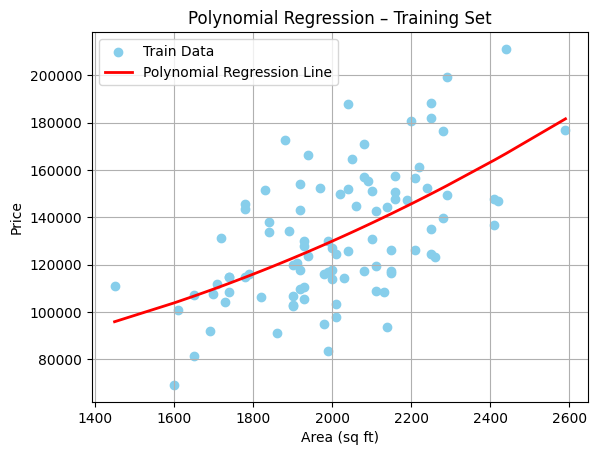

In [24]:
# Step 6: Plot Regression Line on Training Data

# Sort the training data by X for a smooth curve
X_train_sorted = np.sort(X_train, axis=0)
X_poly_sorted = poly_features.transform(X_train_sorted)

y_pred_line = polynomial_regression_model.predict(X_poly_sorted)

plt.scatter(X_train, y_train, color='skyblue', label='Train Data')
plt.plot(X_train_sorted, y_pred_line, color='red', linewidth=2, label='Polynomial Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Polynomial Regression – Training Set')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Predict on train and test
y_train_pred = polynomial_regression_model.predict(x_train_poly)
y_test_pred = polynomial_regression_model.predict(x_test_poly)
# Evaluate model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [27]:
# Prepare results
results = {
"Train RMSE": train_rmse,
"Test RMSE": test_rmse,
"Train R2": train_r2,
"Test R2": test_r2
}

In [29]:
results

{'Train RMSE': np.float64(22320.255626909395),
 'Test RMSE': np.float64(22527.356846811464),
 'Train R2': 0.3313171917969987,
 'Test R2': 0.17215686013865605}